In [ ]:
!apt-get install poppler-utils tesseract-ocr libmagic-dev
!pip install protobuf==3.20.3
!pip install --upgrade tensorflow tensorflow-metadata
%pip install -Uq "unstructured[all-docs]" pillow lxml pillow

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  libmagic-dev poppler-utils tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 5 newly installed, 0 to remove and 49 not upgraded.
Need to get 5,107 kB of archives.
After this operation, 16.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libmagic-dev amd64 1:5.41-3ubuntu0.1 [105 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.5 [186 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:5 http://archive.ubuntu.com/ubuntu jammy/universe amd64 te

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 85.0 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-metadata
    Found existing installation: tensorflow-metadata 1.13.1
    Uninstalling tensorflow-metadata-1.13.1:
      Successfully uninstalled tensorflow-metadata-1.13.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully uninstalled tensorboard-2.17.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.1
    Uninstalling tensorflow-2.17.1:
      Successfully uninstalled tensorflow-2.17.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.18.0 which is incompatible.
     ━━━━━━━

In [ ]:
from unstructured.partition.pdf import partition_pdf
import os

# Define paths
input_dir = "/content/pdf_files"  # Directory containing the PDFs
# Get list of all PDF files in the input directory
pdf_files = [os.path.join(input_dir, f) for f in os.listdir(input_dir) if f.endswith(".pdf")]

# Dictionary to store chunks for each PDF
pdf_chunks = {}

# Loop over each file
i=0
for pdf_file in pdf_files:
    print(f"Processing: {pdf_file}")

    # Extract content
    chunks = partition_pdf(
        filename=pdf_file,
        infer_table_structure=True,
        strategy="hi_res",
        extract_image_block_types=["Image", "Table"],
        #image_output_dir_path=output_dir,  # Optional for saving images/tables
        extract_image_block_to_payload=True,
        chunking_strategy="by_title",
        max_characters=10000,
        combine_text_under_n_chars=2000,
        new_after_n_chars=6000,
    )

    # Store in the dictionary with the file name as the key
    pdf_chunks[i] =chunks
    i=i+1

print("Processing completed!")
print(i)

Processing: /content/pdf_files/1-s2.0-S1526612522007459-main.pdf


yolox_l0.05.onnx:   0%|          | 0.00/217M [00:00<?, ?B/s]

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

config.json:   0%|          | 0.00/1.47k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/115M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/46.8M [00:00<?, ?B/s]

Processing: /content/pdf_files/s00170-018-1932-y.pdf
Processing: /content/pdf_files/Ratkus_2024_J._Phys.__Conf._Ser._2687_082046.pdf
Processing: /content/pdf_files/1-s2.0-S2950431724000509-main.pdf
Processing: /content/pdf_files/Overview_on_Additive_Manufacturing_Technologies.pdf
Processing: /content/pdf_files/s40033-024-00813-6.pdf
Processing completed!
6


In [ ]:
chunks=pdf_chunks[0]
elements = chunks[0].metadata.orig_elements
chunk_images = [el for el in elements if 'Image' in str(type(el))]
chunk_images[0].to_dict()

{'type': 'Image',
 'element_id': 'c22c9bcb-da39-4c7b-bef7-8c8ae3f4f77f',
 'text': 'ELSEVIER',
 'metadata': {'coordinates': {'points': ((102.20472222222222,
     172.1252472222223),
    (102.20472222222222, 353.2277472222224),
    (267.71666666666664, 353.2277472222224),
    (267.71666666666664, 172.1252472222223)),
   'system': 'PixelSpace',
   'layout_width': 1654,
   'layout_height': 2205},
  'last_modified': '2025-01-03T10:35:32',
  'filetype': 'PPM',
  'languages': ['eng'],
  'page_number': 1,
  'image_base64': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAC1AKYDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxM

In [ ]:
# Get the images from the CompositeElement objects
def get_images_base64(chunks):
    images_b64 = []
    for chunk in chunks:
        if "CompositeElement" in str(type(chunk)):
            chunk_els = chunk.metadata.orig_elements
            for el in chunk_els:
                if "Image" in str(type(el)):
                    images_b64.append(el.metadata.image_base64)
    return images_b64

images = get_images_base64(chunks)

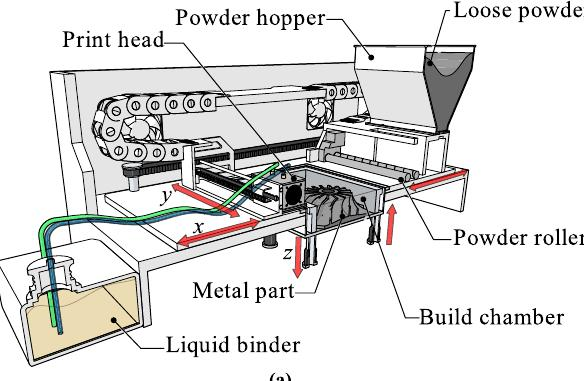

In [ ]:
import base64
from IPython.display import Image, display

def display_base64_image(base64_code):
    # Decode the base64 string to binary
    image_data = base64.b64decode(base64_code)
    # Display the image
    display(Image(data=image_data))

display_base64_image(images[8])

In [ ]:
i=0
pdf_data={}
for chunks in pdf_chunks.values():
    tables = []
    texts = []
    images_b64 = []
    for chunk in chunks:
        if "Table" in str(type(chunk)):
            tables.append(chunk)
        elif "CompositeElement" in str(type(chunk)):
            texts.append(chunk)
            chunk_els = chunk.metadata.orig_elements
            for el in chunk_els:
                if "Image" in str(type(el)):
                    images_b64.append(el.metadata.image_base64)

    # Store in the dictionary

    pdf_data[i] = {
        "text": texts,
        "tables": tables,
        "images": images_b64
    }
    i=i+1


In [ ]:
pdf_data

{0: {'text': [<unstructured.documents.elements.CompositeElement at 0x7a8e2dd47a90>,
  'tables': [],
  'images': ['/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAC1AKYDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD37NUp9WtbW7a3nZ4yqeYXZDs25wTu6YHf0yM9ay/EGI5fOW6m3JHmS3

In [ ]:
pdf_data[0]["text"][0].text

'Journal of Manufacturing Processes 84 (2022) 1001-1029\n\nELSEVIER\n\nContents lists available at ScienceDirect\n\nJournal of Manufacturing Processes\n\njournal homepage: www.elsevier.com/locate/manpro\n\nReview\n\nAn overview of modern metal additive manufacturing technology\n\nite\n\nMark Armstrong *, Hamid Mehrabi, Nida Naveed\n\nFaculty of Technology, School of Engineering, University of Sunderland, Sunderland SR1 3SD, UK\n\nA R T I C L E I N F O\n\nA B S T R A C T\n\nKeywords:\n\nKeywords:\n\nMetal additive manufacturing Additive manufacturing technology Additive manufacturing processes Rapid prototyping\n\nManufacturing process\n\nThere has been significant development in metal additive manufacturing (MAM) technology over the past few decades, and considerable progress has been made in understanding how various processes and their parameters influence the properties of printed metallic parts. Despite this, the knowledge concerning its characteristics has been dispersed across a 

In [ ]:


import os
from unstructured.partition.pdf import partition_pdf
import base64
from IPython.display import Image, display

# Assuming pdf_data dictionary is already populated from the previous code

for i, data in pdf_data.items():
    # Create directory for each PDF
    pdf_dir = f"/content/pdf_output/pdf_{i}"  # Or any other desired path
    os.makedirs(pdf_dir, exist_ok=True)

    # Save tables to individual text files
    with open(os.path.join(pdf_dir, f"text_{i}.txt"), "a") as f:
      for text_chunk in data["text"]:
        f.write(str(text_chunk.text))
        f.write("\n")

    # Save text chunks to individual text files
    with open(os.path.join(pdf_dir, f"table_{i}.txt"), "a") as f:
      for text_chunk in data["tables"]:
        f.write(str(text_chunk.text))
        f.write("\n")
        f.write("-" * 20)
        f.write("\n")


    # Save images
    for j, image_b64 in enumerate(data["images"]):
      try:
        image_data = base64.b64decode(image_b64)
        with open(os.path.join(pdf_dir, f"image_{j}.png"), "wb") as f:
          f.write(image_data)
      except Exception as e:
        print(f"Error saving image {j}: {e}")

In [ ]:
from google.colab import files
import zipfile

# Create a zip file of the /content/pdf_output directory
!zip -r /content/pdf_output.zip /content/pdf_output

# Download the zip file
files.download("/content/pdf_output.zip")

  adding: content/pdf_output/ (stored 0%)
  adding: content/pdf_output/pdf_3/ (stored 0%)
  adding: content/pdf_output/pdf_3/image_7.png (deflated 6%)
  adding: content/pdf_output/pdf_3/image_6.png (deflated 7%)
  adding: content/pdf_output/pdf_3/image_16.png (deflated 11%)
  adding: content/pdf_output/pdf_3/table_3.txt (stored 0%)
  adding: content/pdf_output/pdf_3/image_10.png (deflated 8%)
  adding: content/pdf_output/pdf_3/image_4.png (deflated 7%)
  adding: content/pdf_output/pdf_3/image_13.png (deflated 13%)
  adding: content/pdf_output/pdf_3/text_3.txt (deflated 66%)
  adding: content/pdf_output/pdf_3/image_5.png (deflated 7%)
  adding: content/pdf_output/pdf_3/image_0.png (deflated 2%)
  adding: content/pdf_output/pdf_3/image_2.png (deflated 7%)
  adding: content/pdf_output/pdf_3/image_14.png (deflated 8%)
  adding: content/pdf_output/pdf_3/image_11.png (deflated 12%)
  adding: content/pdf_output/pdf_3/image_1.png (deflated 2%)
  adding: content/pdf_output/pdf_3/image_15.png (d

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>